In [4]:
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

from old.src import preprocessed_dataframe

## Take a closer look at cosine-weighting

1. create ch4-data with by taking different latitudes slices
2. run preprocessing two times: with and without cosine-weighting
3. compare ch4 values for both (weighted/unweighted) cases

In [3]:
ds = xr.open_dataset("../data/CMIP7_CH4.nc", use_cftime=True)

year_slices = ["2002-01-15 00:00:00", "2004-01-15 00:00:00"]
lat_slices = [
    [0., 15.],
    [0., 30.],
    [-45., 45],
    [0., 82.5],
]

df_cosine = preprocessed_dataframe(
    ds = ds,
    lat_slices=lat_slices,
    year_slices=year_slices,
    weight_method="cosine",
)

df_unweighted = preprocessed_dataframe(
    ds = ds,
    lat_slices=lat_slices,
    year_slices=year_slices,
    weight_method="unweighted",
)

### Plot results

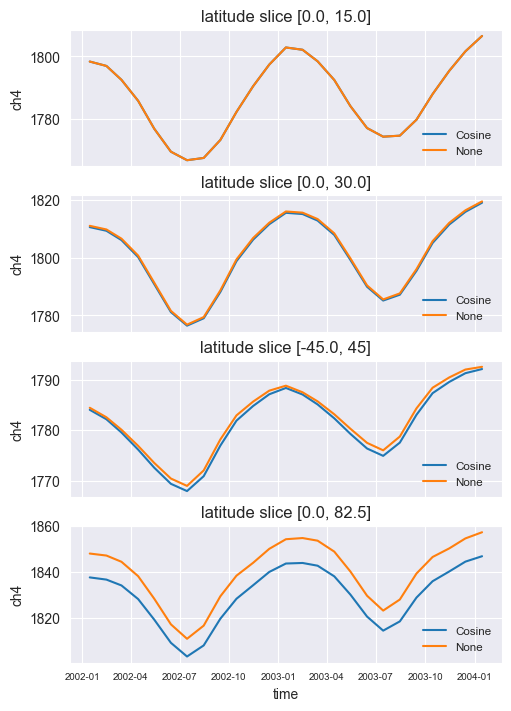

In [5]:
df_cosine["weight"] = "Cosine"
df_unweighted["weight"] = "None"

df_combined = pd.concat([df_cosine, df_unweighted])

fig, ax = plt.subplots(
    4,1, constrained_layout=True, figsize=(5,7),
    sharex=True
)
for i in range(len(lat_slices)):
    sns.lineplot(
        data=df_combined[df_combined.lat_bnd==str(lat_slices[i])],
        x="time", y="ch4", hue="weight", ax=ax[i])
    ax[i].set_title("latitude slice {}".format(lat_slices[i]))
    ax[i].legend(fontsize="small", frameon=False, loc="lower right")
ax[3].tick_params("x", labelsize=7)
plt.show()
